In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


# Titanic EDA to Predict
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="ml">Applying Several ML Algorithms</a></li>
<li><a href="conclusion">Conclusion and Final Comments</a></li>

</ul>

<a id='intro'></a>
## Introduction



>The sinking of the Titanic is one of the most infamous shipwrecks in history.
>On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

> ### Data Dictionary

>1. survival = Survival / 0 = No, 1 = Yes
2. pclass = Ticket class / 1 = 1st, 2 = 2nd, 3 = 3rd
3. sex = Sex 	
4. Age = Age in years 	
5. sibsp = of siblings / spouses aboard the Titanic 	
6. parch = of parents / children aboard the Titanic 	
7. ticket = Ticket number 	
8. fare = Passenger fare 	
9. cabin = Cabin number 	
10. embarked = Port of Embarkation / C = Cherbourg, Q = Queenstown, S = Southampton

> ### Variable Notes

>pclass: A proxy for socio-economic status (SES)
/1st = Upper
/2nd = Middle
/3rd = Lower

>age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

>sibsp: The dataset defines family relations in this way...
/Sibling = brother, sister, stepbrother, stepsister
/Spouse = husband, wife (mistresses and fiancés were ignored)

>parch: The dataset defines family relations in this way...
/Parent = mother, father
/Child = daughter, son, stepdaughter, stepson
/Some children travelled only with a nanny, therefore parch=0 for them.


### Which questions will we find answers in the Exploratory Data Analysis section?

> 1. What is the number of survivors and non-survivors among those who boarded from which port by gender and in what class?
>
> 2. What are the Passengers' survival percentages by class and gender?
>
> 3. What are the number  of survived/drowned passengers  by age and gender?
>
> 4. What are the Passengers' survival/drowned distribution for passengers with parents / children on board?
> 
> 5. What is the proportion of survivors and non-survivors among siblings and spouse(except mistresses and fiancés )?
>


<a id='wrangling'></a>
## Data Wrangling

> After uploading the data, We will perform the clearing, deleting, editing and explore operations in this section in order to get it ready for analysis. Therefore, We need some important libraries which are has been imported at below.

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math
from scipy import interpolate
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [3]:
train_df = pd.read_csv("train.csv")

In [4]:
# take look our data frame
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# let's look from bottom
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#Check data type
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:>

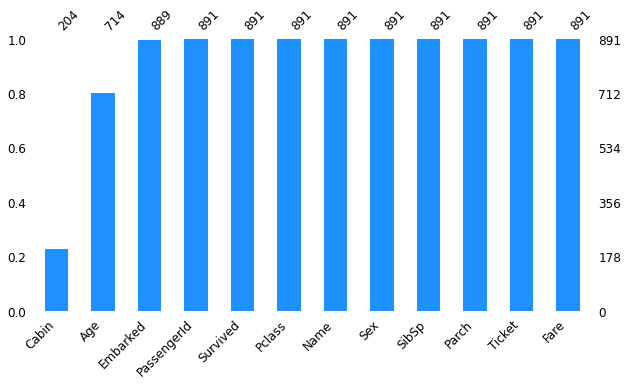

In [7]:
msno.bar(train_df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)

In [8]:
#let's look at list if sum of null values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

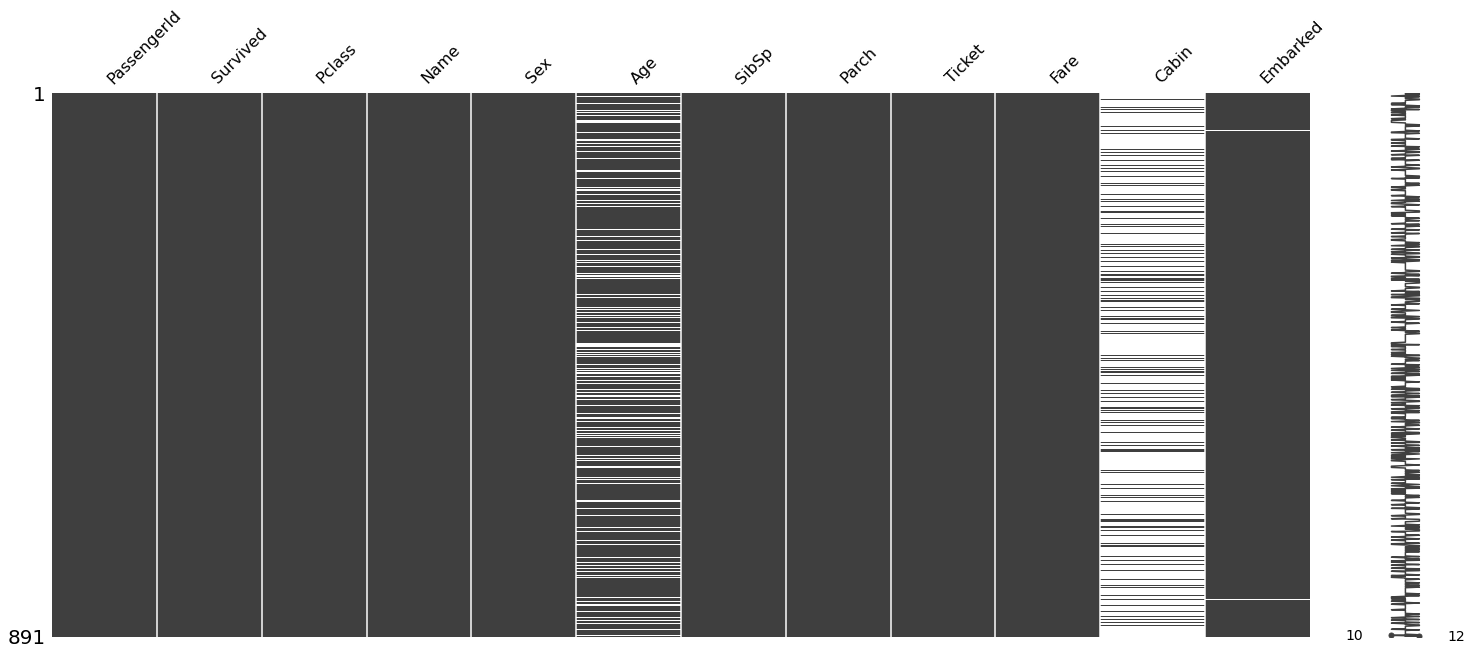

In [9]:
# we can look at our missing value with matris that is provide us to understand those missing values are rondom or not
msno.matrix(train_df)


In [10]:
# Before the look correlations for missing values we should convert the a few columns that are not numerical and might have more corretion with missings.

train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)


train_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#Let's look at correlation between ages.
train_df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


### Final Decide for Missing Values
#### Embarked :
> We found two approach for handle the missing values.
>
> First, that is total MCAR(Missing completely at random) we can delete that rows for just when we are analyze with embarked.
>
> Second, Looking at the two missing values for 'Embarked', we can see that the passengers traveled together, as they have the same ticket number. We then look at the price they have paid for the ticket and compare it with a range of passengers who paid a similar fee and traveled in the same class. From those passengers, we calculate the mode and use this value as our two missing Embarked values.
#### Age : 
> This could be a case of MAR(Missing at random) as we cannot directly observe the reason for missingness of data in these columns. We should fill them. There are various approach to fill it. We will figure out this missing values with find median of combination with columns(Gender and Class) which have more correlation between age column.
#### Cabin : 
>There are a lot of missing in this column we are not going to use in our analyze therefore,we can drop that column.


In [12]:
# Filling of Embarked Column
train_df[train_df['Embarked'].isna()] #Passengers travelling together

sub_embarked = train_df[(train_df['Fare'] > 79) & (train_df['Fare'] < 81) & (train_df['Pclass'] == 1)]
fill_mode = sub_embarked["Embarked"].mode()[0]


train_df = train_df.fillna({'Embarked': fill_mode})

In [13]:
# Drop cabin column
train_df = train_df.drop(['Cabin'], axis=1)
# Also we can drop ticket column now because we will not use future analyza and predict.
train_df = train_df.drop(["Ticket"], axis=1)

In [14]:
# Let's create one matrix for guess based on Sex and Pclass column.
ags = np.zeros((2,3))
ags

array([[0., 0., 0.],
       [0., 0., 0.]])

In [15]:
# We created function we will use also test data in Applying Several ML Algorithms section.
def find_ages(df):
    for i in range(0, 2):
        for j in range(0, 3):
            g_df = df[(df['Sex'] == i) & (df['Pclass'] == j+1)]['Age'].dropna()


            guess = g_df.median()

            # Convert random age float to nearest .5 age
            ags[i,j] = int( guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            df.loc[ (df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1),'Age'] = ags[i,j]

    df['Age'] = df['Age'].astype(int)


In [16]:
#Call function with train data set
find_ages(train_df)

In [17]:
# Check to missing values again
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(1), int64(7), object(2)
memory usage: 69.7+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> 
> Now our data is clean and ready to analyze !

### Question 1: What is the number of survivors and non-survivors among those who boarded from which port by gender and in what class?

In [18]:
pd.crosstab([train_df.Embarked,train_df.Pclass],[train_df.Sex,train_df.Survived],margins=True).style.background_gradient(cmap='summer_r')

#### Question 1 Comment:
>The highest number of women and men who lost their lives are 3rd class passengers at Southampton Embarkation port.
>
>The number of people who lost their lives was in the 3rd class most in total.

### Question 2: What are the Passengers' survival percentages by class and gender?

In [19]:
pd.crosstab([train_df.Sex,train_df.Survived],train_df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

#### Question 4 Comment :
>Almost all the women (% 97) in the 1st class survived.
>
>Although the number of passengers in the 2nd class is less than the number of passengers in the 1st class, the number of survivors in the 1st class is higher.

### Question 3 : Number  of survived/drowned passengers  by age and gender?

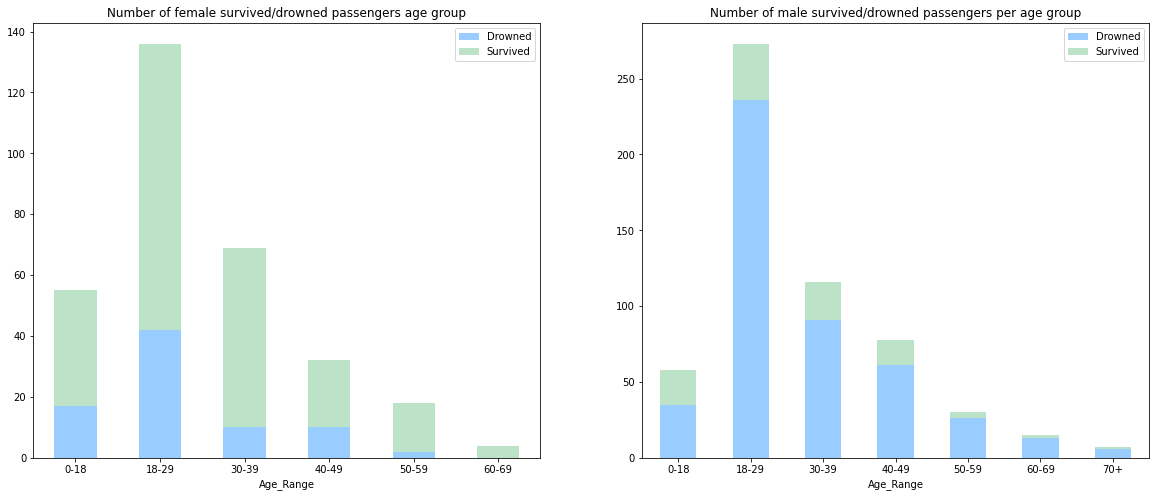

In [20]:
def age_buckets(x): 
    if x < 18: return '0-18' 
    elif x < 30: return '18-29'
    elif x < 40: return '30-39' 
    elif x < 50: return '40-49' 
    elif x < 60: return '50-59' 
    elif x < 70: return '60-69' 
    elif x >=70: return '70+' 
    else: return 'other'
    
    
train_df["Age"] = train_df["Age"].astype(int)

train_df["Age_Range"] = train_df["Age"].apply(lambda x: age_buckets(x))

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8))  

grouped_by_age_female = train_df[train_df["Sex"] == 1].groupby(["Age_Range"])["Survived"].value_counts().unstack()
grouped_by_age_female.plot.bar(stacked=True, color=['#99CCFF', '#BCE2C8'], rot=0,ax=ax1, title="Number of female survived/drowned passengers age group")
ax1.legend(('Drowned', 'Survived'))

grouped_by_age_men = train_df[train_df["Sex"] == 0].groupby(["Age_Range"])["Survived"].value_counts().unstack()
grouped_by_age_men.plot.bar(stacked=True, color=['#99CCFF', '#BCE2C8'], rot=0,ax=ax2, title="Number of male survived/drowned passengers per age group")
ax2.legend(('Drowned', 'Survived'))

#### Question 3 Comment:
>We can conclude that the number of female survivors per age group is higher than the number of females per age group that drowned.
>
>When looking at the number of male survivors, we can observe that male passenger were more likely to drown in all age groups.

### Question 4 : What are the Passengers' survival/drowned distribution for passengers with parents / children on board?

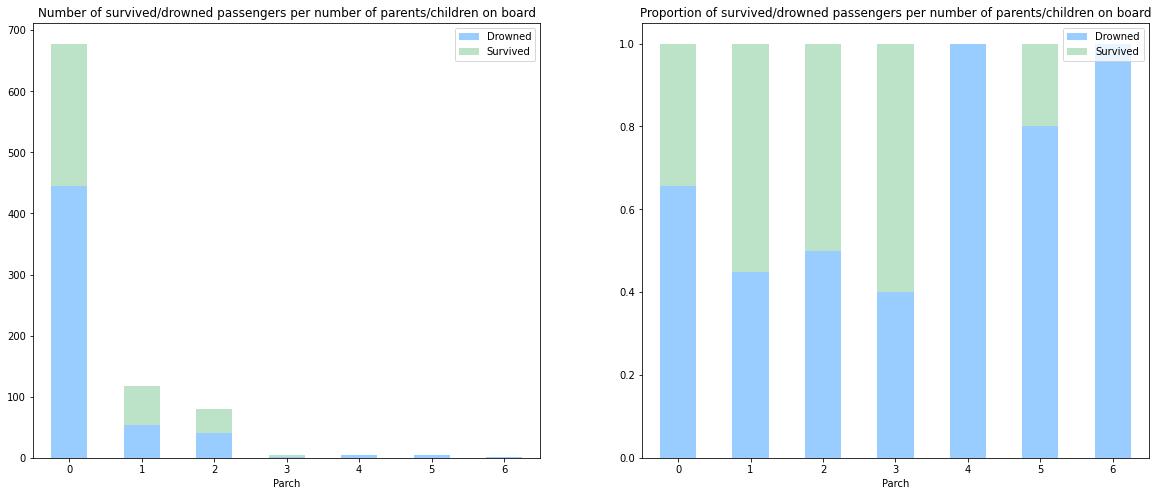

In [21]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8)) 

grouped_by_family = train_df.groupby(["Parch"])["Survived"].value_counts()
grouped_by_family.unstack().plot.bar(stacked=True, color=['#99CCFF', '#BCE2C8'], rot=0,ax=ax1, title="Number of survived/drowned passengers per number of parents/children on board")
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
ax1.legend(('Drowned', 'Survived'))

grouped_by_family_norm = train_df.groupby(["Parch"])["Survived"].value_counts(normalize=True)
grouped_by_family_norm.unstack().plot.bar(stacked=True, color=['#99CCFF', '#BCE2C8'], rot=0,ax=ax2, title="Proportion of survived/drowned passengers per number of parents/children on board")
ax2.legend(('Drowned', 'Survived'))

#### Question 4 Comment:
> We can see that the majority of the passengers traveled without children/parents. If traveling with children/parents, the chances of surviving have not been significantly higher.

### Question 5: What is the proportion of survivors and non-survivors among siblings and spouse(except mistresses and fiancés )?

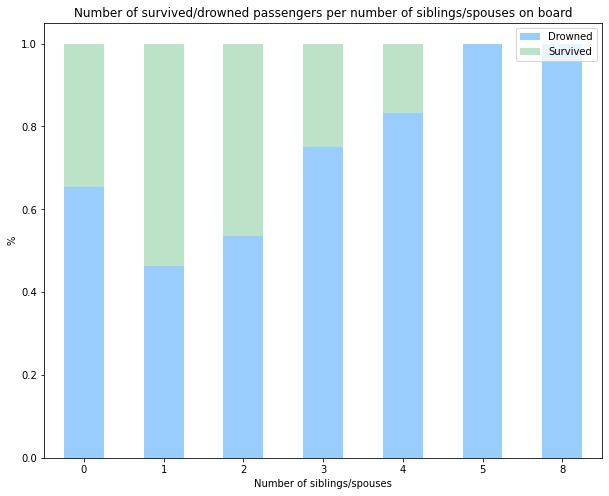

In [22]:
grouped_by_sibsp = train_df.groupby('SibSp')['Survived'].value_counts(normalize=True).unstack()
grouped_by_sibsp.plot(kind='bar', color=["#99CCFF", "#BCE2C8"], stacked=True, rot=0, figsize=(10,8), title="Number of survived/drowned passengers per number of siblings/spouses on board")
plt.legend(( 'Drowned', 'Survived'))

plt.xlabel('Number of siblings/spouses')
plt.ylabel('%')
plt.show()

#### Question 5 Comment:
>We can observe that the percentage of survivors that traveled with siblings/spouses of size 1 and 2 is bigger compared to single travelers. On the contrary when traveling with starting 3 siblings/spouses the percentage of surviving decreases.

### Visualization

In [23]:
#Sex and Embarked columns to check if there's any correlation between them and the Survived data

train_df['Sex_data'] = train_df['Sex'].map({'male': 1,'female': 0})
train_df['Embarked_data'] = train_df['Embarked'].map({'S': 0,'C': 1, 'Q': 2})
train_df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Sex_data,Embarked_data
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.039529,-0.057527,-0.001652,0.012658,NaN,-0.030444
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.060291,-0.035322,0.081629,0.257307,NaN,0.111203
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.414682,0.083081,0.018443,-0.549500,NaN,0.040138
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.104584,0.114631,0.245489,0.182333,NaN,0.121266
Age,0.039529,-0.060291,-0.414682,-0.104584,1.000000,-0.250248,-0.175708,0.123250,NaN,-0.053629
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.250248,1.000000,0.414838,0.159651,NaN,-0.061591
Parch,-0.001652,0.081629,0.018443,0.245489,-0.175708,0.414838,1.000000,0.216225,NaN,-0.080277
Fare,0.012658,0.257307,-0.549500,0.182333,0.123250,0.159651,0.216225,1.000000,NaN,0.065492
Sex_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked_data,-0.030444,0.111203,0.040138,0.121266,-0.053629,-0.061591,-0.080277,0.065492,NaN,1.000000


Text(0.5, 1.0, 'Correlation')

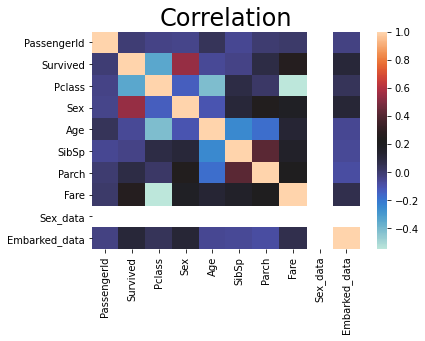

In [24]:
sns.heatmap(train_df.corr(), cmap='icefire')
plt.title('Correlation', fontsize=24)
#In our analysis we see a low correlation between embarked and sex.

In [25]:
#Visualization of 'Survived' (Target column)
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0, 0.5, 'Passenger Count')

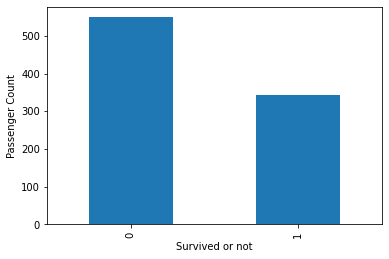

In [26]:
train = train_df.Survived.value_counts().plot(kind='bar')
train.set_xlabel('Survived or not')
train.set_ylabel('Passenger Count')


*Based on the information we have, we can see that only 342 people out of 891 passengers survived on our graph.

Text(0, 0.5, 'Survival Probability')

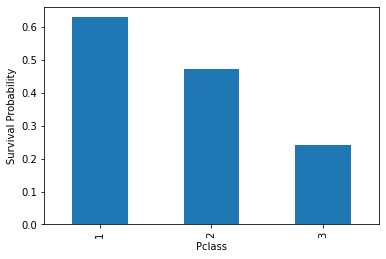

In [27]:
train = train_df[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot(kind='bar')
train.set_xlabel('Pclass')
train.set_ylabel('Survival Probability')

*Based on the information we have, we can see that first class has the most survived passengers.

<AxesSubplot:xlabel='Sex'>

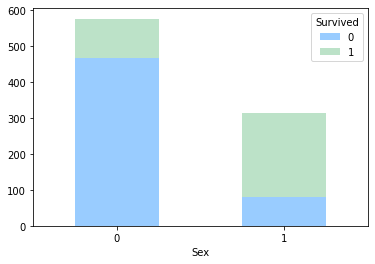

In [28]:
#Survival per Age/Sex
grouped_by_sex = train_df.groupby(["Sex"])["Survived"].value_counts()
grouped_by_sex.unstack().plot.bar(stacked=True, color=['#99CCFF', '#BCE2C8'], rot=0)

> <a id='ml'></a>
## Applying Several ML Algorithms

### Before the start Ml apply we will change the columns into the numerical values. And we will edit test data to get better predict.

In [29]:
# Let's read Test Data and look our train data that we edited in EDA section.
test_df = pd.read_csv("test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Range,Sex_data,Embarked_data
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,S,18-29,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,C,30-39,NaN,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,S,18-29,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,S,30-39,NaN,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,S,30-39,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,13.0000,S,18-29,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,30.0000,S,18-29,NaN,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21,1,2,23.4500,S,18-29,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,30.0000,C,18-29,NaN,1


In [31]:
# Delete some columns that are we will not use
train_df = train_df.drop(['Sex_data'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

In [32]:
# Let's look at missings columns for test data 
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [33]:
# Call our function to fill age column as the same way
test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
find_ages(test_df)

In [34]:
test_df[test_df.isna().any(axis=1)].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",0,60,0,0,NaN,S


In [35]:
df_new = test_df[test_df["Pclass"] == 3]
fare_median = df_new["Fare"].median()

test_df["Fare"] = test_df["Fare"].fillna(fare_median) 

In [36]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    int64  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 29.5+ KB


In [37]:
# Add to title columns it will effect our model
def add_title(df):
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

add_title(train_df)
add_title(test_df)


In [38]:
# Make numerical value for title 
def num_title(df):
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

    df['Title'] = df['Title'].map(title_mapping)
    df['Title'] = df['Title'].fillna(0)

num_title(train_df)
num_title(test_df)

In [39]:
#Let's look at corr between title and survived
train_df.corr()

# As we can see there is too much corr with it.


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_data,Title
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.039529,-0.057527,-0.001652,0.012658,-0.030444,0.003878
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.060291,-0.035322,0.081629,0.257307,0.111203,0.407753
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.414682,0.083081,0.018443,-0.549500,0.040138,-0.173929
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.104584,0.114631,0.245489,0.182333,0.121266,0.502713
Age,0.039529,-0.060291,-0.414682,-0.104584,1.000000,-0.250248,-0.175708,0.123250,-0.053629,-0.093425
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.250248,1.000000,0.414838,0.159651,-0.061591,0.269623
Parch,-0.001652,0.081629,0.018443,0.245489,-0.175708,0.414838,1.000000,0.216225,-0.080277,0.315784
Fare,0.012658,0.257307,-0.549500,0.182333,0.123250,0.159651,0.216225,1.000000,0.065492,0.136310
Embarked_data,-0.030444,0.111203,0.040138,0.121266,-0.053629,-0.061591,-0.080277,0.065492,1.000000,0.048012
Title,0.003878,0.407753,-0.173929,0.502713,-0.093425,0.269623,0.315784,0.136310,0.048012,1.000000


In [40]:
# Now we can delete name column
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [41]:
# We should creat age band get better predict.

def age_range(df):
    df.loc[ df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[ df['Age'] > 64, 'Age']

age_range(train_df)
age_range(test_df)
train_df = train_df.drop(['Age_Range'], axis=1)


In [42]:
train_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_data,Title
0,1,0,3,0,1,1,0,7.2500,S,0,1
1,2,1,1,1,2,1,0,71.2833,C,1,3
2,3,1,3,1,1,0,0,7.9250,S,0,2
3,4,1,1,1,2,1,0,53.1000,S,0,3
4,5,0,3,0,2,0,0,8.0500,S,0,1


In [43]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,Q,1
1,893,3,1,2,1,0,7.0000,S,3
2,894,2,0,3,0,0,9.6875,Q,1
3,895,3,0,1,0,0,8.6625,S,1
4,896,3,1,1,1,1,12.2875,S,3


In [44]:
train_df = train_df.drop(["Embarked"], axis=1)

In [45]:
# Let's make embarked numerical value for test data set
test_df['Embarked_data'] = test_df['Embarked'].map({'S': 0,'C': 1, 'Q': 2})

In [46]:
test_df = test_df.drop(["Embarked"], axis=1)

In [47]:
# We also do not need passengerid in train data for predict 
train_df = train_df.drop(["PassengerId"], axis=1)


In [48]:
# We can create fareband before to create range we sholud look how many band we can create?
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)
# I tried to 4,5,6 ranges but after for survived rate near to similar to others so we should choose 4 bands.

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [49]:
def create_fare(df):
    df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
    df.loc[ df['Fare'] > 31, 'Fare'] = 3
    df['Fare'] = df['Fare'].astype(int)

create_fare(train_df)
create_fare(test_df)
train_df = train_df.drop(['FareBand'], axis=1)

    
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_data,Title
0,0,3,0,1,1,0,0,0,1
1,1,1,1,2,1,0,3,1,3
2,1,3,1,1,0,0,1,0,2
3,1,1,1,2,1,0,3,0,3
4,0,3,0,2,0,0,1,0,1
5,0,3,0,1,0,0,1,2,1
6,0,1,0,3,0,0,3,0,1
7,0,3,0,0,3,1,2,0,4
8,1,3,1,1,0,2,1,0,3
9,1,2,1,0,1,0,2,1,3


In [50]:
train_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_data,Title
Survived,1.000000,-0.338481,0.543351,-0.065095,-0.035322,0.081629,0.295875,0.111203,0.407753
Pclass,-0.338481,1.000000,-0.131900,-0.119955,0.083081,0.018443,-0.628459,0.040138,-0.173929
Sex,0.543351,-0.131900,1.000000,-0.086719,0.114631,0.245489,0.248940,0.121266,0.502713
Age,-0.065095,-0.119955,-0.086719,1.000000,-0.066396,-0.043457,0.026774,0.038205,-0.042927
SibSp,-0.035322,0.083081,0.114631,-0.066396,1.000000,0.414838,0.394248,-0.061591,0.269623
Parch,0.081629,0.018443,0.245489,-0.043457,0.414838,1.000000,0.393048,-0.080277,0.315784
Fare,0.295875,-0.628459,0.248940,0.026774,0.394248,0.393048,1.000000,-0.086303,0.341665
Embarked_data,0.111203,0.040138,0.121266,0.038205,-0.061591,-0.080277,-0.086303,1.000000,0.048012
Title,0.407753,-0.173929,0.502713,-0.042927,0.269623,0.315784,0.341665,0.048012,1.000000


In [51]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_data
0,892,3,0,2,0,0,0,1,2
1,893,3,1,2,1,0,0,3,0
2,894,2,0,3,0,0,1,1,2
3,895,3,0,1,0,0,1,1,0
4,896,3,1,1,1,1,1,3,0


In [52]:
X = train_df.drop("Survived", axis=1)
Y = train_df["Survived"]

### Starting ML modeling 

In [53]:
X_tr, X_ts, Y_tr, Y_ts =  train_test_split(X,Y, test_size=0.2, random_state=1) 
#Feature scaling
sc_X = StandardScaler()
X_tr = pd.DataFrame(sc_X.fit_transform(X_tr),columns = X_tr.columns)
X_ts = pd.DataFrame(sc_X.fit_transform(X_ts),columns = X_ts.columns)


#### KNN

In [54]:
list_neighbors = {}

for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_tr, Y_tr)
    Y_pred_knn = knn.predict(X_ts)
    accuracy_knn = round(knn.score(X_tr, Y_tr) * 100, 2)
    #print("Number of neigbors: " + str(i)+ " Accuracy is = " + str(accuracy_knn))
    list_neighbors[i] = accuracy_knn
    
max_key = max(list_neighbors, key=list_neighbors.get)
all_values = list_neighbors.values()
max_value_knn = max(all_values)
print("The max accuracy is % " + str(max_value_knn) + " with " + str(max_key) + " neighbors.")



The max accuracy is % 87.22 with 3 neighbors.


Text(0.5, 1.0, 'Accuracy vs K-value')

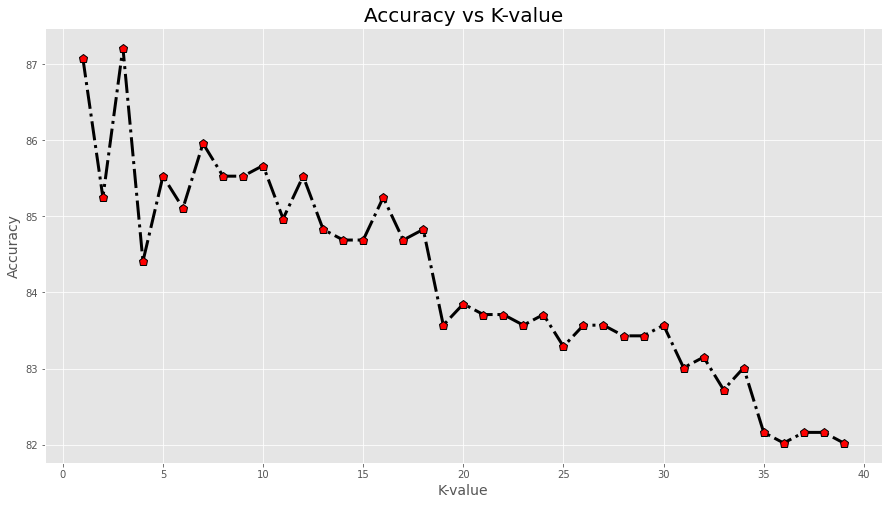

In [55]:
plt.style.use('ggplot')
plt.subplots(figsize = (15,8))
accuracies = []
for k in range(1,40):
    accuracies.append(list_neighbors[k])
plt.plot(range(1,40), accuracies , linewidth=3 , linestyle = 'dashdot', color = 'black', marker = 'p',markersize=9, markerfacecolor = 'red')

plt.xlabel('K-value',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.title('Accuracy vs K-value', fontsize=20)

#### Logistic Regression

In [56]:

logreg = LogisticRegression()
logreg.fit(X_tr, Y_tr)
Y_pred = logreg.predict(X_ts)
accuracy_log = round(logreg.score(X_tr, Y_tr) * 100, 2)
print(accuracy_log)


80.62


#### Linear Discriminant Analysis

In [57]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_tr, Y_tr)
Y_pred = lda.predict(X_ts)
accuracy_lda = round(lda.score(X_tr, Y_tr) * 100, 2)
print(accuracy_lda)


80.48


#### Compering ML Models

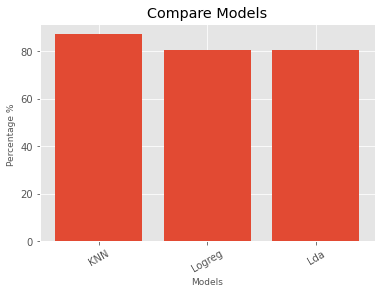

In [58]:
label = ['KNN','Logreg','Lda']
list_accuracy = [max_value_knn,accuracy_log,accuracy_lda]
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, list_accuracy)
    plt.xlabel('Models', fontsize=9)
    plt.ylabel('Percentage % ', fontsize=9)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('Compare Models')
    plt.show()
    
plot_bar_x()

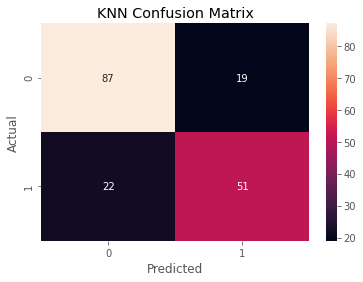

In [59]:
ax = plt.axes()
cf_knn = pd.crosstab(Y_ts, Y_pred_knn, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cf_knn, annot=True)
ax.set_title('KNN Confusion Matrix')
plt.show()

In [60]:
# Let's predict with our test data
X_tr = train_df.drop("Survived", axis=1)
Y_tr = train_df["Survived"]
X_ts  = test_df.drop("PassengerId", axis=1).copy()
X_tr.shape, Y_tr.shape, X_ts.shape

((891, 8), (891,), (418, 8))

In [61]:
list_neighbors = {}

for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_tr, Y_tr)
    Y_pred_knn = knn.predict(X_ts)
    accuracy_knn = round(knn.score(X_tr, Y_tr) * 100, 2)
    #print("Number of neigbors: " + str(i)+ " Accuracy is = " + str(accuracy_knn))
    list_neighbors[i] = accuracy_knn
    
    
max_key = max(list_neighbors, key=list_neighbors.get)
all_values = list_neighbors.values()
max_value_knn_test = max(all_values)
print("The max accuracy is % " + str(max_value_knn_test) + " with " + str(max_key) + " neighbors.")

The max accuracy is % 85.97 with 3 neighbors.


In [62]:
logreg = LogisticRegression()
logreg.fit(X_tr, Y_tr)
Y_pred = logreg.predict(X_ts)
accuracy_log_test = round(logreg.score(X_tr, Y_tr) * 100, 2)
print(accuracy_log_test)

79.69


In [63]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_tr, Y_tr)
Y_pred = lda.predict(X_ts)
accuracy_lda_test = round(lda.score(X_tr, Y_tr) * 100, 2)
print(accuracy_lda_test)

79.57


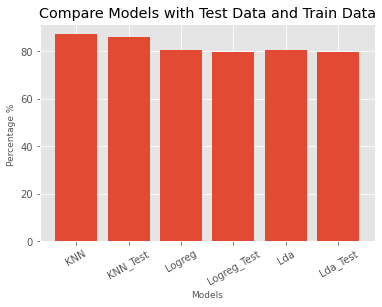

In [64]:
label = ['KNN','KNN_Test','Logreg','Logreg_Test','Lda','Lda_Test']
list_accuracy = [max_value_knn,max_value_knn_test,accuracy_log,accuracy_log_test,accuracy_lda,accuracy_lda_test]
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, list_accuracy)
    plt.xlabel('Models', fontsize=9)
    plt.ylabel('Percentage % ', fontsize=9)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('Compare Models with Test Data and Train Data')
    plt.show()
    
plot_bar_x()

#### As we can see on the plot there is no big different between train data set and test data set.We observe changes approximately %1 accuracy.


### Now we will take diffrent sample size from train data set to look our effects of sample.


In [65]:
knn_accs=[]
log_accs=[]
lda_accs=[]
for j in range(9):
    size = (j+1)/10
    X_tr, X_ts, Y_tr, Y_ts =  train_test_split(X,Y, test_size=size, random_state=1) 
    #Feature scaling
    sc_X = StandardScaler()
    X_tr = sc_X.fit_transform(X_tr)
    X_ts = sc_X.fit_transform(X_ts)
    #Knn
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_tr, Y_tr)
    Y_pred_knn = knn.predict(X_ts)
    accuracy_knn = round(knn.score(X_tr, Y_tr) * 100, 2)
    knn_accs.append(accuracy_knn)
    print("Sample size of test for KNN  :" + str(size)+ ", Accuracy is : " + str(accuracy_knn)  )
    #Logreg
    logreg = LogisticRegression()
    logreg.fit(X_tr, Y_tr)
    Y_pred = logreg.predict(X_ts)
    accuracy_log = round(logreg.score(X_tr, Y_tr) * 100, 2)
    log_accs.append(accuracy_log)
    print("Sample size of test for Log  :" + str(size)+ ", Accuracy is : " + str(accuracy_log)  )
    #Lda
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_tr, Y_tr)
    Y_pred = lda.predict(X_ts)
    accuracy_lda= round(lda.score(X_tr, Y_tr) * 100, 2)
    lda_accs.append(accuracy_lda)
    print("Sample size of test for Lda  :" + str(size)+ ", Accuracy is : " + str(accuracy_lda)  )
    
    
    


Sample size of test for KNN  :0.1, Accuracy is : 85.14
Sample size of test for Log  :0.1, Accuracy is : 80.52
Sample size of test for Lda  :0.1, Accuracy is : 80.15
Sample size of test for KNN  :0.2, Accuracy is : 87.22
Sample size of test for Log  :0.2, Accuracy is : 80.62
Sample size of test for Lda  :0.2, Accuracy is : 80.48
Sample size of test for KNN  :0.3, Accuracy is : 85.23
Sample size of test for Log  :0.3, Accuracy is : 81.54
Sample size of test for Lda  :0.3, Accuracy is : 80.9
Sample size of test for KNN  :0.4, Accuracy is : 88.01
Sample size of test for Log  :0.4, Accuracy is : 82.4
Sample size of test for Lda  :0.4, Accuracy is : 82.02
Sample size of test for KNN  :0.5, Accuracy is : 88.31
Sample size of test for Log  :0.5, Accuracy is : 82.92
Sample size of test for Lda  :0.5, Accuracy is : 82.7
Sample size of test for KNN  :0.6, Accuracy is : 88.76
Sample size of test for Log  :0.6, Accuracy is : 83.71
Sample size of test for Lda  :0.6, Accuracy is : 83.43
Sample size o

In [66]:
def plot_sample(model,accs):
    
    plt.style.use('ggplot')
    plt.subplots(figsize = (15,8))
    sample = [ ]
    for i in range(9):
        sample.append((i+1)/10)

    plt.plot(sample, accs , linewidth=3 , linestyle = 'dashed', color = 'gray', marker = 'D',markersize=9, markerfacecolor = 'blue')
    title = 'Accuracy vs Sample Size on '+ model
    plt.xlabel('Sample Size',fontsize=14)
    plt.ylabel('Accuracy',fontsize=14)
    plt.title(title, fontsize=20)

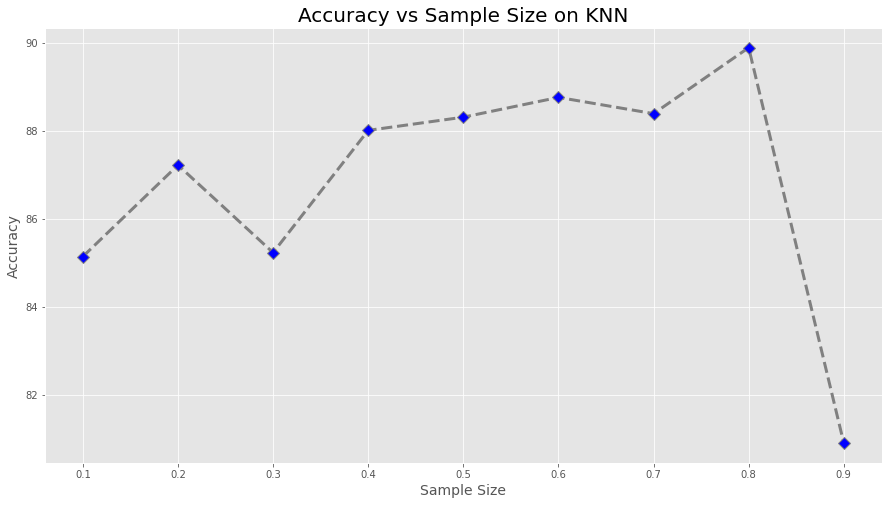

In [67]:
plot_sample("KNN",knn_accs)

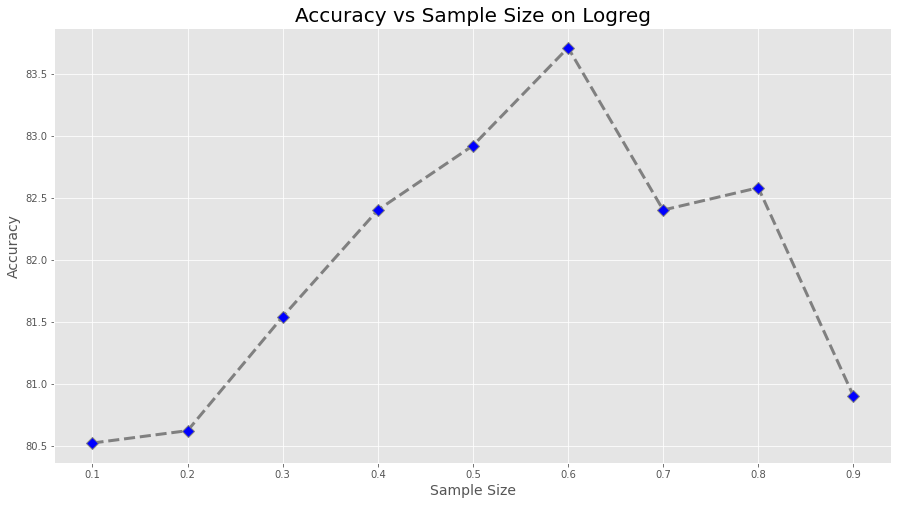

In [68]:
plot_sample("Logreg",log_accs)

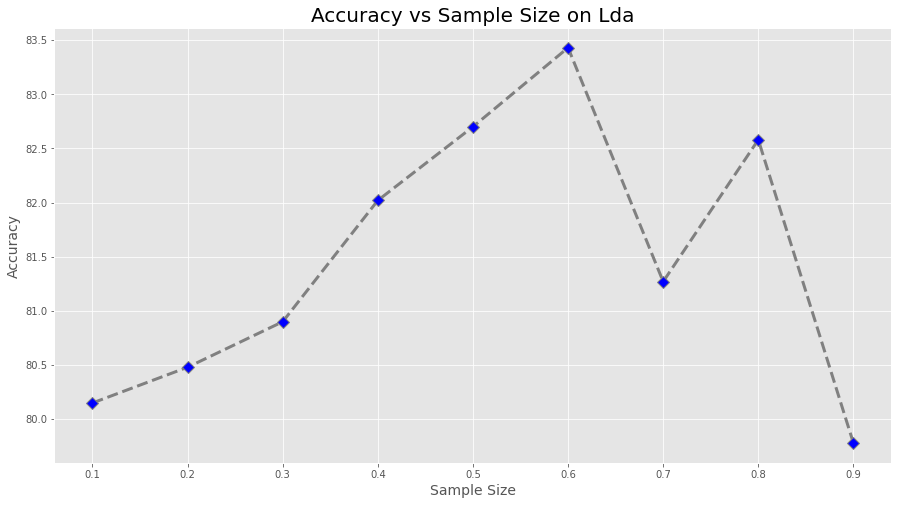

In [69]:
plot_sample("Lda",lda_accs)

### We will look as well to find which columns our indicators.

In [70]:
columns = []
train_df_new = train_df.copy()
for col in train_df_new.columns: 
    columns.append(col)
columns.pop(0)
columns

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_data', 'Title']

In [71]:
i = 'Pclass'
train_df_new.drop(i, axis=1)

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_data,Title
0,0,0,1,1,0,0,0,1
1,1,1,2,1,0,3,1,3
2,1,1,1,0,0,1,0,2
3,1,1,2,1,0,3,0,3
4,0,0,2,0,0,1,0,1
...,...,...,...,...,...,...,...,...
886,0,0,1,0,0,1,0,5
887,1,1,1,0,0,2,0,2
888,0,1,1,1,2,2,0,2
889,1,0,1,0,0,2,1,1


In [72]:
a_knn = {}
a_log = {}
a_lda = {}
for i in columns:
    train_df_1 = train_df.copy()
    i = str(i)
    train_df_1.drop(i, axis=1, inplace=True )
    X = train_df_1.drop("Survived", axis=1)
    Y = train_df_1["Survived"]
    
    X_tr, X_ts, Y_tr, Y_ts =  train_test_split(X,Y, test_size=0.2, random_state=1) 
    #Feature scaling
    sc_X = StandardScaler()
    X_tr = sc_X.fit_transform(X_tr)
    X_ts = sc_X.fit_transform(X_ts)
    
    #Knn
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_tr, Y_tr)
    Y_pred_knn = knn.predict(X_ts)
    accuracy_knn = round(knn.score(X_tr, Y_tr) * 100, 2)
    a_knn[i]=(87.22-accuracy_knn)
    #Logreg
    logreg = LogisticRegression()
    logreg.fit(X_tr, Y_tr)
    Y_pred = logreg.predict(X_ts)
    accuracy_log = round(logreg.score(X_tr, Y_tr) * 100, 2)
    a_log[i] = (80.62-accuracy_log)
    #Lda
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_tr, Y_tr)
    Y_pred = lda.predict(X_ts)
    accuracy_lda= round(lda.score(X_tr, Y_tr) * 100, 2)
    a_lda[i] = (80.48-accuracy_lda)


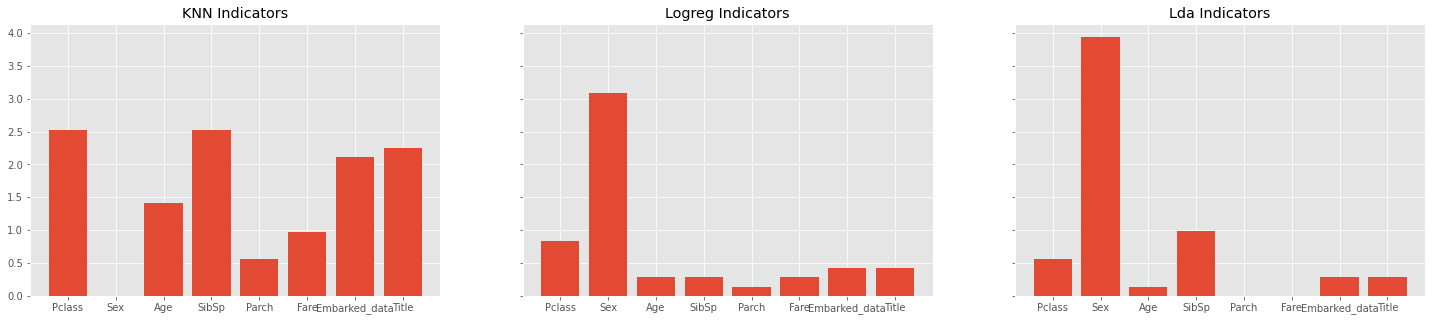

In [73]:
fig, ((ax1,ax2,ax3)) = plt.subplots(1, 3,figsize=(25, 5), sharex=True, sharey=True)

ax1.bar(a_knn.keys(), a_knn.values())
ax2.bar(a_log.keys(), a_log.values())
ax3.bar(a_lda.keys(), a_lda.values())
ax1.title.set_text('KNN Indicators')
ax2.title.set_text('Logreg Indicators')
ax3.title.set_text('Lda Indicators')

plt.show()

In [74]:
# As we can see at below our indicators are four column: Pclass, Sex, Sibsp, and Title.
# Now we will look at accuracy with 4 columns.

train_df_2 = train_df.copy()
train_df_2.drop(["Age"], axis=1, inplace=True )
train_df_2.drop(["Parch"], axis=1, inplace=True )
train_df_2.drop(["Fare"], axis=1, inplace=True )
train_df_2.drop(["Embarked_data"], axis=1, inplace=True )
X = train_df_2.drop("Survived", axis=1)
Y = train_df_2["Survived"]
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_tr, Y_tr)
Y_pred_knn = knn.predict(X_ts)
accuracy_knn = round(knn.score(X_tr, Y_tr) * 100, 2)
#Logreg
logreg = LogisticRegression()
logreg.fit(X_tr, Y_tr)
Y_pred = logreg.predict(X_ts)
accuracy_log = round(logreg.score(X_tr, Y_tr) * 100, 2)
#Lda
lda = LinearDiscriminantAnalysis()
lda.fit(X_tr, Y_tr)
Y_pred = lda.predict(X_ts)
accuracy_lda= round(lda.score(X_tr, Y_tr) * 100, 2)


print(accuracy_knn)
print(accuracy_log)
print(accuracy_lda)

84.97
80.2
80.2


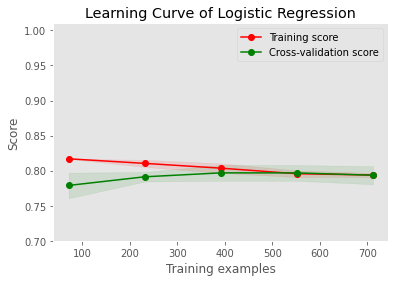

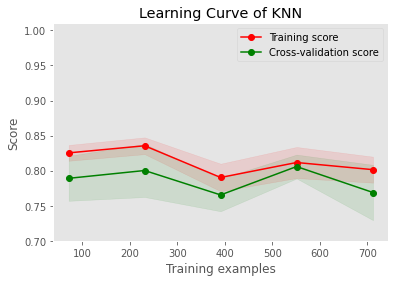

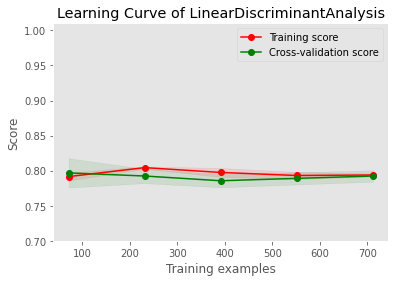

In [75]:

from sklearn.model_selection import learning_curve
def plot_curve(clf,title):

    train_sizes,train_scores,test_scores = learning_curve(clf,X,Y,random_state = 1,cv = 5)

    plt.figure()
    plt.title(title)

    ylim = (0.7, 1.01)
    if ylim is not None:
        plt.ylim(*ylim)

    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.1,
                color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
        label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
        label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

plot_curve(LogisticRegression(),'Learning Curve of Logistic Regression')
plot_curve(KNeighborsClassifier(),'Learning Curve of KNN')
plot_curve(LinearDiscriminantAnalysis(),'Learning Curve of LinearDiscriminantAnalysis')


Optimal nr of features: 4
Best features: Index(['Pclass', 'Sex', 'SibSp', 'Title'], dtype='object')


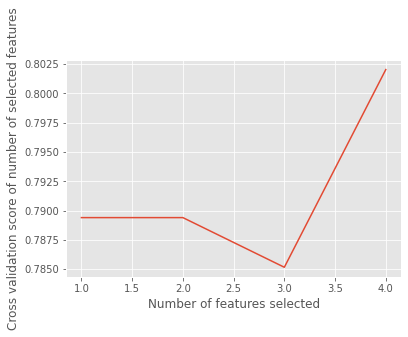

,Model,Score,Score_rfe,Score_rfecv
0,KNN,84.97,74.30,77.09
1,Logistic Regression,80.20,77.65,77.09
2,LDA,80.20,77.65,78.21


In [76]:
X_tr, X_ts, Y_tr, Y_ts =  train_test_split(X,Y, test_size=0.2, random_state=1) 
#Feature scaling
sc_X = StandardScaler()
X_tr = pd.DataFrame(sc_X.fit_transform(X_tr),columns = X_tr.columns)
X_ts = pd.DataFrame(sc_X.fit_transform(X_ts),columns = X_ts.columns)
#Recursive Feature Elimination

from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV

rfe = RFE(estimator=logreg,step=1)
rfe = rfe.fit(X_tr,Y_tr)

selected_rfe_features = pd.DataFrame({'Feature':list(X_tr.columns), 'Ranking': rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')


# Redefine  X and Y RFE
X_train_rfe = rfe.transform(X_tr)
X_test_rfe = rfe.transform(X_ts)


#Logistic Regression RFE
logreg_rfe_model = logreg.fit(X_train_rfe,Y_tr)
accuracy_log_rfe = round(accuracy_score(Y_ts,logreg_rfe_model.predict(X_test_rfe))* 100, 2)
accuracy_log_rfe


#KNN RFE
knn_rfe_model = knn.fit(X_train_rfe,Y_tr)
accuracy_knn_rfe = round(accuracy_score(Y_ts,knn_rfe_model.predict(X_test_rfe))* 100, 2)
accuracy_knn_rfe


#LDA RFE
lda_rfe_model = lda.fit(X_train_rfe,Y_tr)
accuracy_lda_rfe = round(accuracy_score(Y_ts,lda_rfe_model.predict(X_test_rfe))* 100, 2)
accuracy_lda_rfe



#-------



# Recursive feature elimination with cross validation


rfecv = RFECV(estimator=logreg,step=1,cv=5,scoring='accuracy')
rfecv = rfecv.fit(X_tr, Y_tr)
print('Optimal nr of features:', rfecv.n_features_)
print('Best features:', X_tr.columns[rfecv.support_])


rfecv.grid_scores_


plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1,len(rfecv.grid_scores_) + 1),rfecv.grid_scores_)
plt.show()


# Redefine  X and Y RFECV
X_train_rfecv = rfecv.transform(X_tr)
X_test_rfecv = rfecv.transform(X_ts)



#Logistic Regression RFECV
logreg_rfecv_model = logreg.fit(X_train_rfecv, Y_tr)
accuracy_log_rfecv = round(accuracy_score(Y_ts,logreg_rfecv_model.predict(X_test_rfecv))* 100, 2)


#KNN RFECV
knn_rfecv_model = knn.fit(X_train_rfecv, Y_tr)
accuracy_knn_rfecv = round(accuracy_score(Y_ts,knn_rfecv_model.predict(X_test_rfecv))* 100, 2)


#LDA RFECV
lda_rfecv_model = lda.fit(X_train_rfecv, Y_tr)
accuracy_lda_rfecv = round(accuracy_score(Y_ts,lda_rfecv_model.predict(X_test_rfecv))* 100, 2)





results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression','LDA'],
    'Score': [accuracy_knn, accuracy_log, accuracy_lda],
    'Score_rfe': [accuracy_knn_rfe, accuracy_log_rfe, accuracy_lda_rfe],
    'Score_rfecv': [accuracy_knn_rfecv, accuracy_log_rfecv, accuracy_lda_rfecv]})

#result_df = results.sort_values(by='Score', ascending=False)
#result_df = result_df.set_index('Score')
results.head(9)


### Decision Trees

In [77]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_tr, Y_tr)
Y_pred = decision_tree.predict(X_ts)
acc_decision_tree = round(decision_tree.score(X_tr, Y_tr) * 100, 2)
acc_decision_tree

84.13

#### Gaussian Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_tr, Y_tr)
Y_pred = gaussian.predict(X_ts)
acc_gaussian = round(gaussian.score(X_tr, Y_tr) * 100, 2)
acc_gaussian

81.88